In [1]:
import pyBeamSim
import numpy as np
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trialsnum_particle = 10240
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation

In [3]:
simulator.get_Beamline_ElementNames()

['DRIFT1',
 'yc_Q1',
 'DRIFT2',
 'yc_Q3',
 'DRIFT3',
 'Q1',
 'DRIFT4',
 'Q2',
 'DRIFT5',
 'Q3',
 'DRIFT6',
 'B1',
 'APERTURERECTANGULAR1']

0.0 s
0.15483427047729492 s


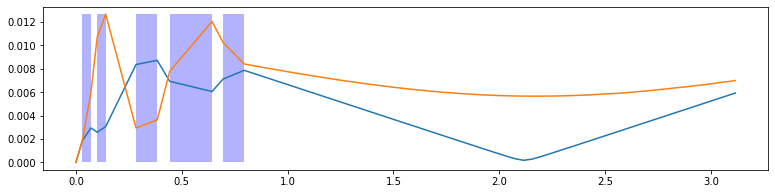

In [54]:
# 测试能否正常运行
num_particle = 10240

simulator = pyBeamSim.BeamSimulator()
simulator.free_beam()
simulator.init_beam(num_particle, 939.294, 1.0, 0.015)
start = time.time()
simulator.set_beamTwiss(0, 0.005, 0.00015,0, 0.005, 0.00015,0, 6.5430429, 0.00005633529, 0, 3, 500, 1)
simulator.save_initial_beam()
# simulator.plot_beam()
# simulator.beam_print_to_file("./beam_file/init_beam")
print(time.time()-start ,'s')
simulator.load_Beamline_From_DatFile("F:/git_workspace/Multi-Particle-BeamLine-Simulation/Main_for_simulation/yc_model.dat")
element_names = simulator.get_Beamline_ElementNames()
start = time.time()
envelope = simulator.simulate_and_getEnvelope(False)
print(time.time()-start, 's')
simulator.plot_envelope(envelope)
# simulator.plot_beam()

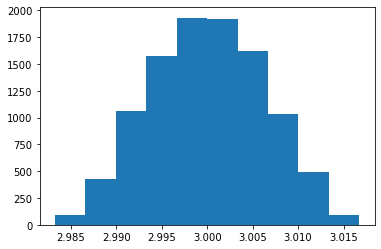

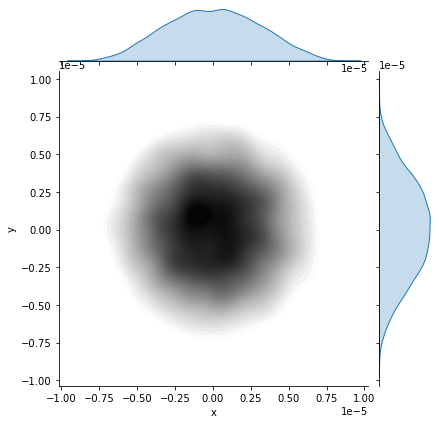

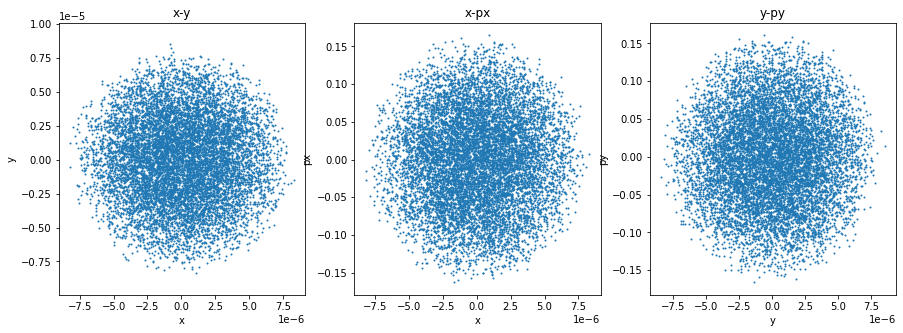

In [52]:
simulator.set_beamTwiss(0, 0.005, 0.00015,0, 0.005, 0.00015,0, 6.5430429, 0.00005633529, 0, 3, 500, 1)
simulator.beam_print_to_file("./beam_file/dipole_out")
beam = np.loadtxt("./beam_file/dipole_out")
plt.hist(beam[:,-3])
# simulator.plot_beam()

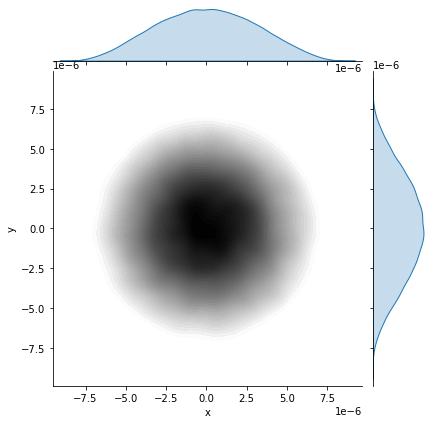

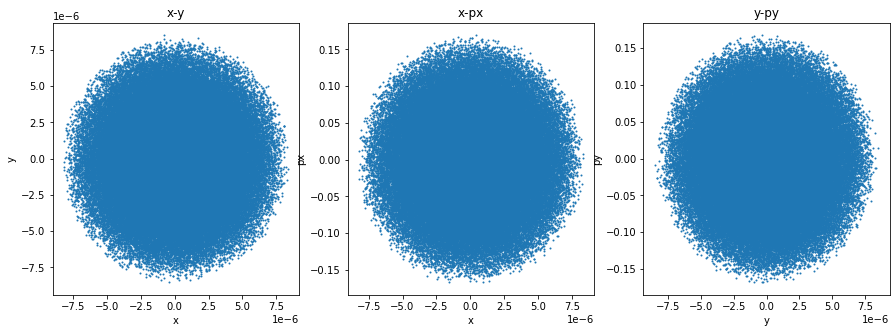

In [26]:
# simulator.restore_initial_beam()
simulator.init_beam(10240*10, 939.294, 1.0, 0.015)
simulator.set_beamTwiss(0, 0.005, 0.00015,0, 0.005, 0.00015,0, 6.5430429, 0.0005633529, 0, 3, 500, 1)
simulator.plot_beam()

In [27]:
simulator.beam_print_to_file("./beam_file/initbeam")

# 制作符合CLAPA-I激光打靶产生的束流参数

In [28]:
beam = np.loadtxt("./beam_file/initbeam")
beam

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  3.01815e+00,
         0.00000e+00,  0.00000e+00],
       [ 4.01865e-06, -3.27042e-02, -3.81779e-06, ...,  3.02849e+00,
         0.00000e+00,  0.00000e+00],
       [ 3.84369e-06, -8.55797e-03, -6.52948e-06, ...,  3.01815e+00,
         0.00000e+00,  0.00000e+00],
       ...,
       [ 1.46712e-06, -7.10380e-02,  2.63162e-06, ...,  2.97179e+00,
         0.00000e+00,  0.00000e+00],
       [ 4.47219e-06,  9.60301e-02,  2.95565e-06, ...,  2.99666e+00,
         0.00000e+00,  0.00000e+00],
       [ 1.49883e-06, -2.29041e-02,  3.83232e-08, ...,  2.97543e+00,
         0.00000e+00,  0.00000e+00]])

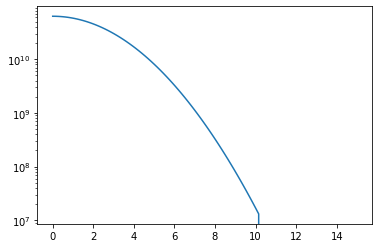

In [29]:
def E_spectrum(x):
    if x < 10.2:
        y = 10**(-x*x/28 + 10.8)
    else:
        y = 0
    return y

x = np.linspace(0,15,100)
# y = [E_spectrum(item) for item in x]
y = list(map(E_spectrum, x))
plt.semilogy(x,y)
plt.show()

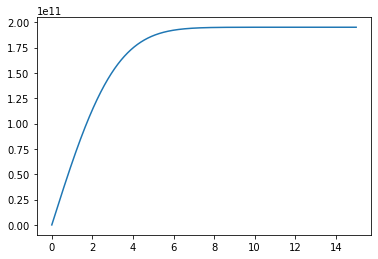

In [30]:
# 数值积分
dE = 0.001
E_list = np.arange(0, 15, dE)
distribute_E = np.zeros(E_list.shape[0])
for i in range(1, E_list.shape[0]):
    E  = E_list[i]    
    distribute_E[i] = distribute_E[i-1] + E_spectrum(E - dE/2) * dE

plt.plot(E_list, distribute_E)

def get_rand_E(num = 1024):
    randnum = np.random.rand(num) * max(distribute_E)
    randE = np.zeros(num)
    for i in range(randnum.shape[0]):
        for ind in range(distribute_E.shape[0]):
            if distribute_E[ind] >= randnum[i]:
                randE[i] = E_list[ind]
                break
    return randE

In [31]:
rand_E = get_rand_E(beam.shape[0])
rand_E

array([0.841, 1.118, 1.944, ..., 0.959, 1.21 , 1.46 ])

In [32]:
# np.savetxt("CLAPA_beam.beam", beam, delimiter="  ")
with open("./beam_file/initbeam", 'r') as f2:
    lines = f2.readlines()
    
with open('CLAPA_beam.beam', 'w') as f1:
    f1.write("charge = 1\n")
    f1.write("mass = 939.294\n")
    f1.write("current = 0.015\n")
    f1.write("frequency = 1\n")
    for i in range(len(lines)):
        line = lines[i]
        coor = line.split()
        f1.write("  ".join(coor[:5]) + "  %f  0  0\n"%rand_E[i]) 

In [17]:
simulator.free_beam()

In [2]:
simulator = pyBeamSim.BeamSimulator()
simulator.free_beam()
simulator.init_beam(102400, 939.294, 1.0, 0.015)
simulator.beam_init_from_file('CLAPA_beam.beam')
# simulator.set_beamTwiss(0, 0.01, 0.000015,0, 0.01, 0.000015,0, 6.5430429, 0.0005633529, 0, 3, 500, 1)
simulator.save_initial_beam()
simulator.load_Beamline_From_DatFile("F:/git_workspace/Multi-Particle-BeamLine-Simulation/Main_for_simulation/yc_model.dat")
simulator.init_spacecharge()

In [22]:
simulator.free_beam()
simulator.init_beam(102400, 939.294, 1.0, 0.015)
simulator.beam_init_from_file('CLAPA_beam.beam')

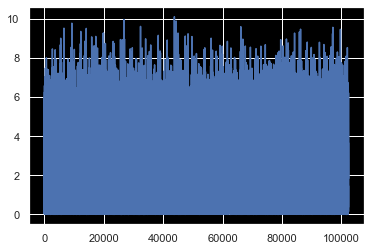

In [23]:
simulator.beam_print_to_file("./beam_file/temp_beam1")
beam_data = np.loadtxt("./beam_file/temp_beam1")
plt.hist(beam_data[:,-3], bins=30)

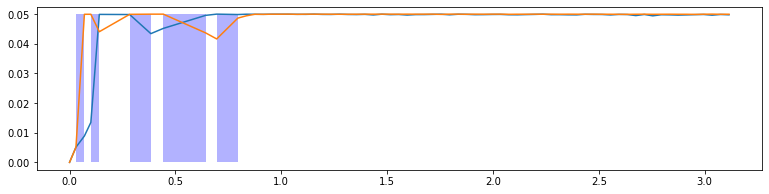

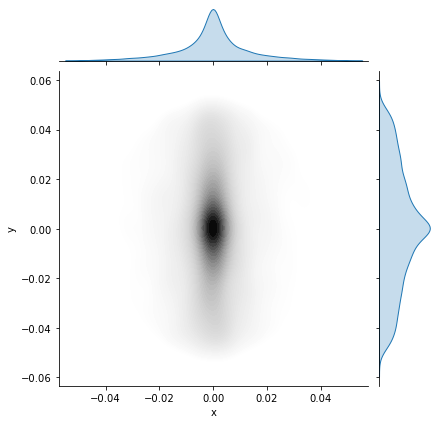

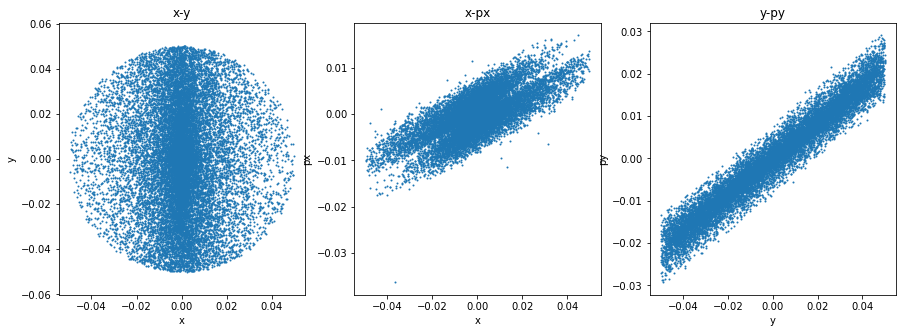

In [3]:
simulator.restore_initial_beam()
# simulator.set_magnet_with_name("Q1", 17.7137197315453)
# simulator.set_magnet_with_name("Q2", -10.726539572259698)
# simulator.set_magnet_with_name("Q3", 7.759270752232808)
envelope = simulator.simulate_and_getEnvelope(False)

simulator.plot_envelope(envelope)
simulator.plot_beam()

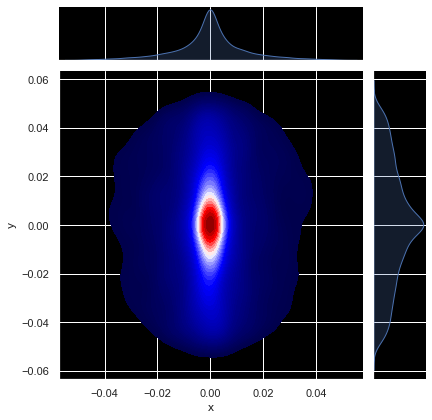

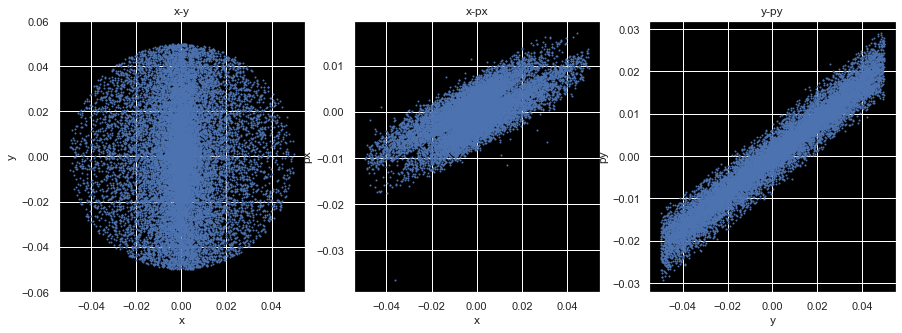

In [15]:
import pandas as pd
import seaborn as sns

simulator.beam_print_to_file("./beam_file/testbeam1")
beam_data = np.loadtxt("./beam_file/testbeam1")

beam_data = beam_data[beam_data[:,-2]==0, :]
intibeam_df = pd.DataFrame(columns=['x','y'])
intibeam_df['x'] = beam_data[:, 0]
intibeam_df['y'] = beam_data[:, 2]
sns.set(rc={'axes.facecolor':'#000000'})
# sns.set(style="darkgrid")
sns.jointplot(x="x", y="y", data=intibeam_df, kind="kde", levels=50, fill=True, cmap='seismic')

plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(beam_data[:, 0], beam_data[:, 2], s=1)
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("x-y")

plt.subplot(1,3,2)
plt.scatter(beam_data[:, 0], beam_data[:, 1], s=1)
plt.xlabel("x")
plt.ylabel("px")
plt.title("x-px")

plt.subplot(1,3,3)
plt.scatter(beam_data[:, 2], beam_data[:, 3], s=1)
plt.xlabel("y")
plt.ylabel("py")
plt.title("y-py")

plt.show()

In [16]:
simulator.beam_print_to_file("./beam_file/testbeam1")
beam = np.loadtxt("./beam_file/testbeam1")
beam

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  8.41000e-01,
         0.00000e+00,  0.00000e+00],
       [-1.61233e-04, -2.37319e-02, -5.15334e-02, ...,  1.11800e+00,
         7.00000e+00,  0.00000e+00],
       [ 7.49250e-04,  8.40390e-04, -4.80000e-02, ...,  1.94400e+00,
         1.80000e+01,  0.00000e+00],
       ...,
       [ 1.33908e-02, -1.07988e-01, -6.28003e-02, ...,  9.59000e-01,
         5.00000e+00,  0.00000e+00],
       [-9.93625e-03,  5.90487e-02,  5.76916e-02, ...,  1.21000e+00,
         5.00000e+00,  0.00000e+00],
       [ 8.68625e-04, -2.60976e-03,  6.42833e-02, ...,  1.46000e+00,
         5.00000e+00,  0.00000e+00]])

(array([1.1139e+04, 1.0895e+04, 1.0619e+04, 9.8680e+03, 9.1680e+03,
        8.3160e+03, 7.5730e+03, 6.5770e+03, 5.5910e+03, 4.7900e+03,
        4.0470e+03, 3.2520e+03, 2.6770e+03, 2.0360e+03, 1.5770e+03,
        1.2270e+03, 9.0400e+02, 6.7000e+02, 4.7500e+02, 3.1700e+02,
        2.4200e+02, 1.5300e+02, 1.0800e+02, 6.7000e+01, 3.6000e+01,
        3.4000e+01, 2.0000e+01, 1.1000e+01, 7.0000e+00, 4.0000e+00]),
 array([1.00000000e-03, 3.38033333e-01, 6.75066667e-01, 1.01210000e+00,
        1.34913333e+00, 1.68616667e+00, 2.02320000e+00, 2.36023333e+00,
        2.69726667e+00, 3.03430000e+00, 3.37133333e+00, 3.70836667e+00,
        4.04540000e+00, 4.38243333e+00, 4.71946667e+00, 5.05650000e+00,
        5.39353333e+00, 5.73056667e+00, 6.06760000e+00, 6.40463333e+00,
        6.74166667e+00, 7.07870000e+00, 7.41573333e+00, 7.75276667e+00,
        8.08980000e+00, 8.42683333e+00, 8.76386667e+00, 9.10090000e+00,
        9.43793333e+00, 9.77496667e+00, 1.01120000e+01]),
 <BarContainer object of 30 

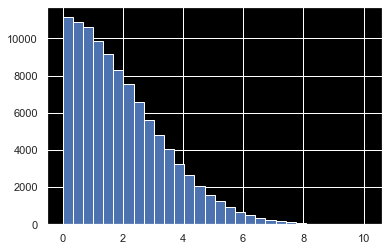

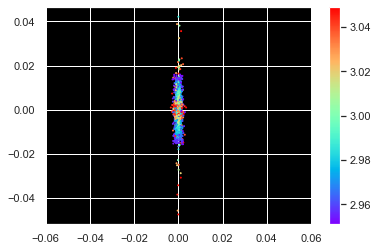

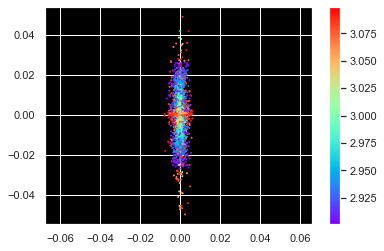

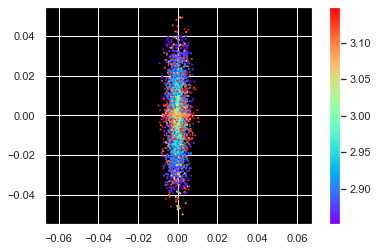

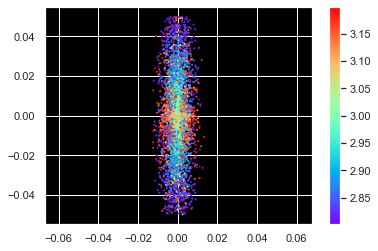

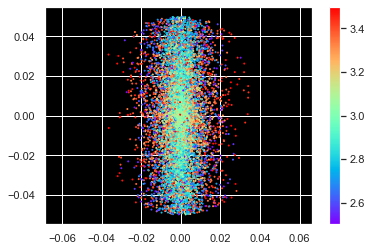

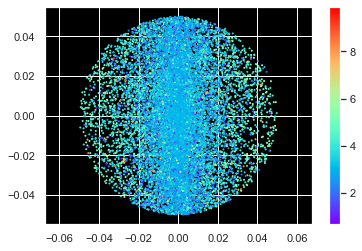

In [18]:
def plot_energy_window(low_bound, high_bound):
    plt.figure()
    select_beam = beam[(beam[:,-3] > low_bound) &(beam[:,-3] < high_bound)&(beam[:,-2] == 0), :]
    plt.scatter(select_beam[:,0], select_beam[:,2], c=select_beam[:,-3], cmap='rainbow' ,s=1)
    plt.axis("equal")
    plt.colorbar()
    plt.show()

plot_energy_window(2.95, 3.05)
plot_energy_window(2.9, 3.1)
plot_energy_window(2.85, 3.15)
plot_energy_window(2.8, 3.2)
plot_energy_window(2.5, 3.5)
plot_energy_window(0, 15)

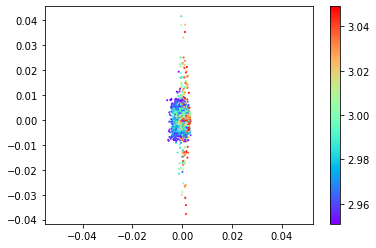

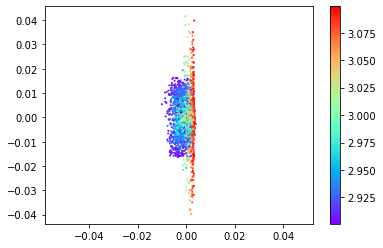

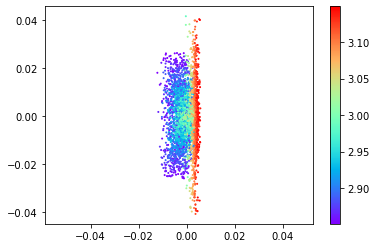

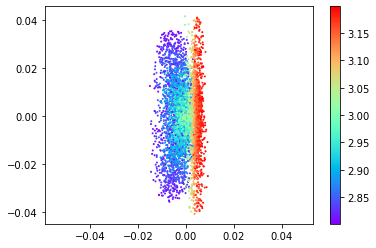

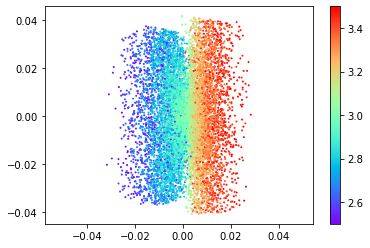

In [22]:
def plot_energy_window(low_bound, high_bound):
    plt.figure()
    select_beam = beam[(beam[:,-3] > low_bound) &(beam[:,-3] < high_bound)&(beam[:,-2] == 0), :]
    plt.scatter(select_beam[:,0], select_beam[:,2], c=select_beam[:,-3], cmap='rainbow' ,s=1)
    plt.axis("equal")
    plt.colorbar()
    plt.show()

plot_energy_window(2.95, 3.05)
plot_energy_window(2.9, 3.1)
plot_energy_window(2.85, 3.15)
plot_energy_window(2.8, 3.2)
plot_energy_window(2.5, 3.5)


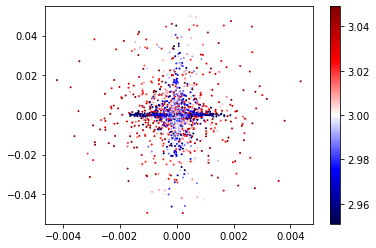

In [35]:
select_beam = beam[(beam[:,-3] > 2.95) &(beam[:,-3] < 3.05)&(beam[:,-2] == 0), :]
plt.scatter(select_beam[:,0], select_beam[:,2], c=select_beam[:,-3], cmap='seismic' ,s=1)
plt.colorbar()

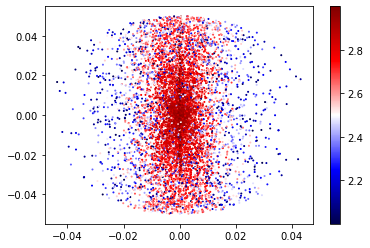

In [36]:
select_beam = beam[(beam[:,-3] > 2) &(beam[:,-3] < 3)&(beam[:,-2] == 0), :]
plt.scatter(select_beam[:,0], select_beam[:,2], c=select_beam[:,-3], cmap='seismic' ,s=1)
plt.colorbar()

# 加上Dipole后

In [4]:
simulator = pyBeamSim.BeamSimulator()
simulator.free_beam()
simulator.init_beam(102400, 939.294, 1.0, 0.015)

In [44]:
simulator.beam_init_from_file('CLAPA_beam.beam')
# simulator.set_beamTwiss(0, 0.01, 0.000015,0, 0.01, 0.000015,0, 6.5430429, 0.0005633529, 0, 3, 500, 1)
simulator.save_initial_beam()
simulator.load_Beamline_From_DatFile("F:/git_workspace/Multi-Particle-BeamLine-Simulation/Main_for_simulation/yc_model.dat")

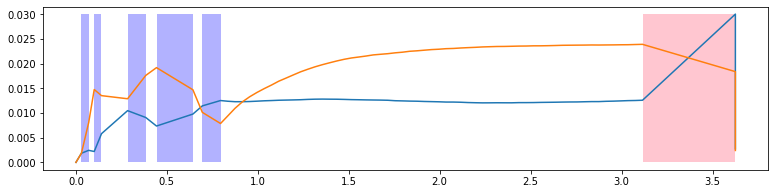

In [45]:
# simulator.set_magnet_with_name("Q1", 17.531148)
# simulator.set_magnet_with_name("Q2", -11.042977)
# simulator.set_magnet_with_name("Q3", 8.907981)
simulator.restore_initial_beam()
envelope = simulator.simulate_and_getEnvelope(False)

simulator.plot_envelope(envelope)
# simulator.plot_beam()

In [38]:
simulator.get_good_num()

0

In [39]:
simulator.beam_print_to_file("./beam_file/dipole_out")
beam = np.loadtxt("./beam_file/dipole_out")
beam.shape

(102400, 8)

selected particles:  3489


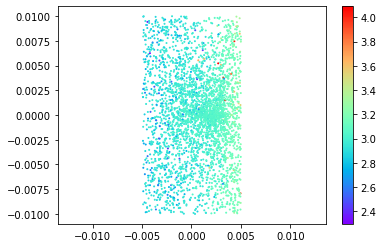

In [40]:
def plot_energy_window(low_bound, high_bound):
    plt.figure()
#     ax = plt.axes()
#     ax.set_facecolor("k")
    select_beam = beam[(beam[:,-3] > low_bound) &(beam[:,-3] < high_bound)&(beam[:,-2] == 0)&(beam[:,0] > -0.02), :]
    print("selected particles: ", select_beam.shape[0])
    plt.scatter(select_beam[:,0], select_beam[:,2], c=select_beam[:,-3], cmap='rainbow' ,s=1)
    plt.axis("equal")
    plt.colorbar()
    plt.show()

# plot_energy_window(2.95, 3.05)
plot_energy_window(0, 15)


2320/20

In [43]:
for i in range(58):
    print("DRIFT 40 50")

DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50
DRIFT 40 50


In [42]:
2320/40

58.0